In [1]:
from pivpy import io, graphics, pivpy
\1from importlib.resources import files
import matplotlib.pyplot as plt
import numpy as np
import pathlib


import os

In [2]:
filename = pathlib.Path(pkg.resource_filename('pivpy','data/openpiv_txt/exp1_001_b.txt'))
data = io.load_vec(filename)

In [3]:
# !pip install watermark

In [4]:
try:
    import watermark  # noqa: F401
    get_ipython().run_line_magic('reload_ext', 'watermark')
    get_ipython().run_line_magic('watermark', '-v -m -p numpy,pivpy')
except ModuleNotFoundError:
    print('watermark not installed; skipping version stamp')


Python implementation: CPython
Python version       : 3.8.12
IPython version      : 8.4.0

numpy: 1.23.2
pivpy: 0.0.15b0

Compiler    : GCC 4.8.5 20150623 (Red Hat 4.8.5-44)
OS          : Linux
Release     : 5.4.0-126-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [5]:
data

<xarray.Dataset>
Dimensions:  (x: 30, y: 22, t: 1)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
  * t        (t) int64 1
Data variables:
    u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
    v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
    chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
Attributes: (2)

In [6]:
data.piv.vec2scal('vorticity')

data

<xarray.Dataset>
Dimensions:  (x: 30, y: 22, t: 1)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
  * t        (t) int64 1
Data variables:
    u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
    v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
    chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
    w        (y, x, t) float64 0.3153 0.1707 0.01252 ... 0.01443 -0.1423 -0.3071
Attributes: (2)

In [7]:
data.piv.vec2scal('vorticity')

<xarray.Dataset>
Dimensions:  (x: 30, y: 22, t: 1)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
  * t        (t) int64 1
Data variables:
    u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
    v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
    chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
    w        (y, x, t) float64 0.3153 0.1707 0.01252 ... 0.01443 -0.1423 -0.3071
Attributes: (2)

In [8]:
data

<xarray.Dataset>
Dimensions:  (x: 30, y: 22, t: 1)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
  * t        (t) int64 1
Data variables:
    u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
    v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
    chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
    w        (y, x, t) float64 0.3153 0.1707 0.01252 ... 0.01443 -0.1423 -0.3071
Attributes: (2)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'t = 1 [frame]'}, xlabel='x [pix]', ylabel='y [pix]'>)

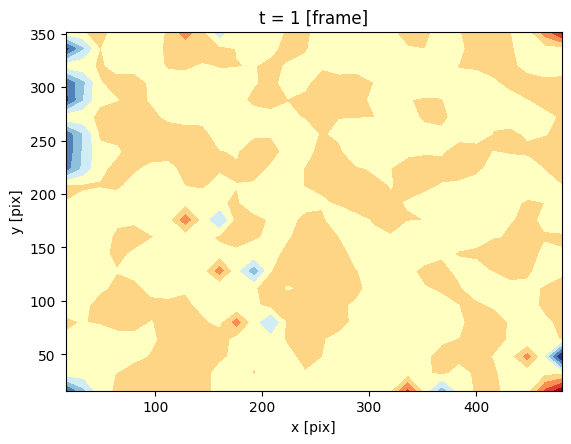

In [9]:
graphics.contour_plot(data.isel(t=0))

In [10]:
data.piv.vec2scal('ke')

<xarray.Dataset>
Dimensions:  (x: 30, y: 22, t: 1)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
  * t        (t) int64 1
Data variables:
    u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
    v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
    chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
    w        (y, x, t) float64 0.07076 28.32 33.84 37.17 ... 27.9 27.77 0.01667
Attributes: (2)

In [11]:
data

<xarray.Dataset>
Dimensions:  (x: 30, y: 22, t: 1)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 80.0 ... 432.0 448.0 464.0 480.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0 ... 304.0 320.0 336.0 352.0
  * t        (t) int64 1
Data variables:
    u        (y, x, t) float64 -0.266 -0.2141 -0.4586 ... -0.2387 -0.1232 0.1291
    v        (y, x, t) float64 0.0 5.318 5.799 6.068 ... 5.294 5.277 5.268 0.0
    chc      (y, x, t) float64 51.12 46.45 55.6 47.62 ... 55.59 56.64 65.51
    w        (y, x, t) float64 0.07076 28.32 33.84 37.17 ... 27.9 27.77 0.01667
Attributes: (2)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'t = 1 [frame]'}, xlabel='x [pix]', ylabel='y [pix]'>)

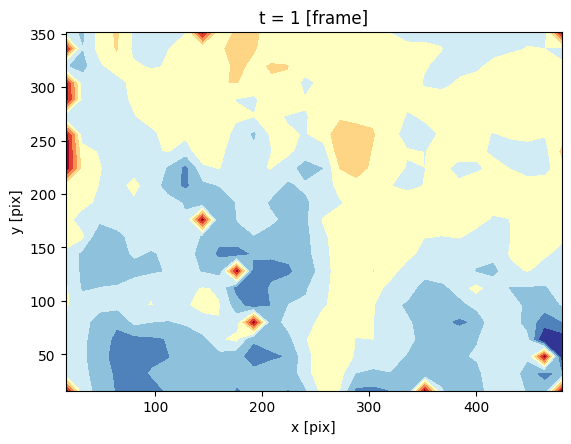

In [12]:
graphics.contour_plot(data.isel(t=0))

/home/user/Documents/repos/pivpy/pivpy/graphics.py:315: UserWarning: Warning: function for a single frame, using the first                frame, supply data.isel(t=N)
  warnings.warn("Warning: function for a single frame, using the first \


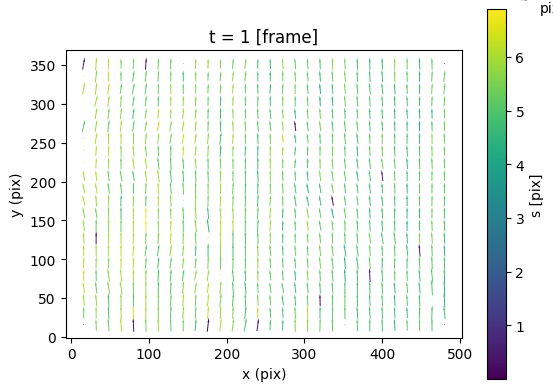

In [13]:
fig,ax = data.piv.quiver(colorbar=True)
# fig.set_size_inches(11,10)

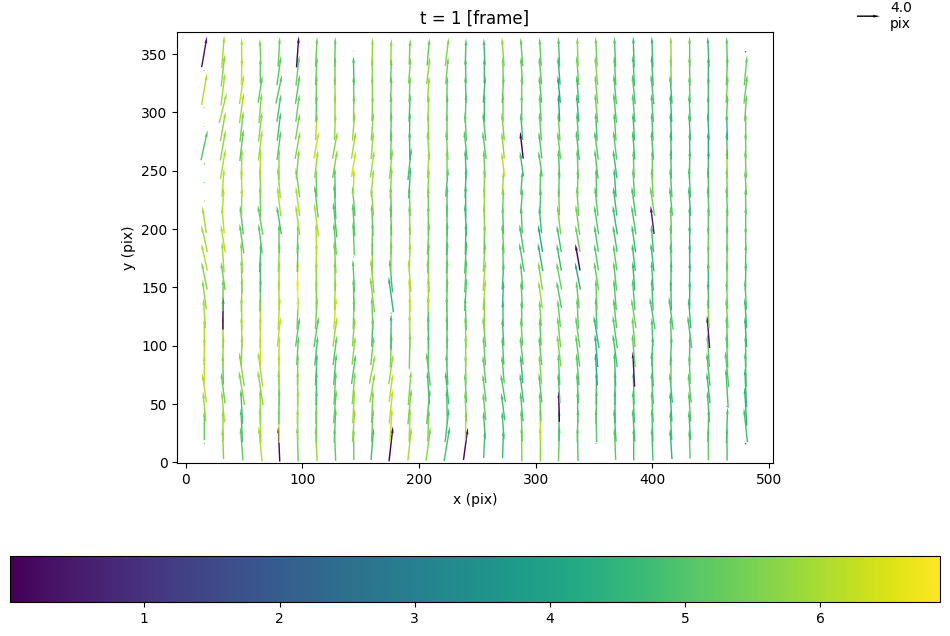

In [14]:
fig,ax = graphics.quiver(data.isel(t=-1),colorbar=True,colorbar_orient='horizontal',arrScale=15)
fig.set_size_inches(12,8)